In [604]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

In [605]:
df = pd.read_csv('data.csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
524,917897,B,9.847,15.68,63.00,293.2,0.09492,0.08419,0.023300,0.024160,...,22.99,74.32,376.5,0.14190,0.22430,0.08434,0.06528,0.2502,0.09209,NaN
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,NaN
235,88249602,B,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,...,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617,NaN
306,89344,B,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,...,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385,NaN
412,905539,B,9.397,21.68,59.75,268.8,0.07969,0.06053,0.037350,0.005128,...,27.99,66.61,301.0,0.10860,0.18870,0.18680,0.02564,0.2376,0.09206,NaN


In [606]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**REMOVING UNNAMED COLUMN**

In [607]:
df.drop(columns='Unnamed: 32', axis = 1, inplace=True)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**ID COLUMN IS CATEGORICAL, NOMINAL VARIABLE. IT COULD NOT HELP FOR ANALYSIS.**
**DIAGNOSIS COLUMN (OUTPUT) IS CATEGORICAL COLUMN AND ALL INPUTS COLUMNS NOW ARE NUMERICAL**

In [609]:
df.drop(columns='id', axis=1, inplace=True)

**ENSURING NO MISSING VALUES IN DATA**

In [610]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [611]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [612]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**ENCODING THE TARGET COLUMN**

In [613]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(df['diagnosis'])

df['target'] = labels

df.drop(columns='diagnosis', axis=1, inplace=True)


# **FEATURE ENGINEERING**

In [614]:
df_copy = df.copy()

In [615]:
correlation_matrix = df_copy.corr()

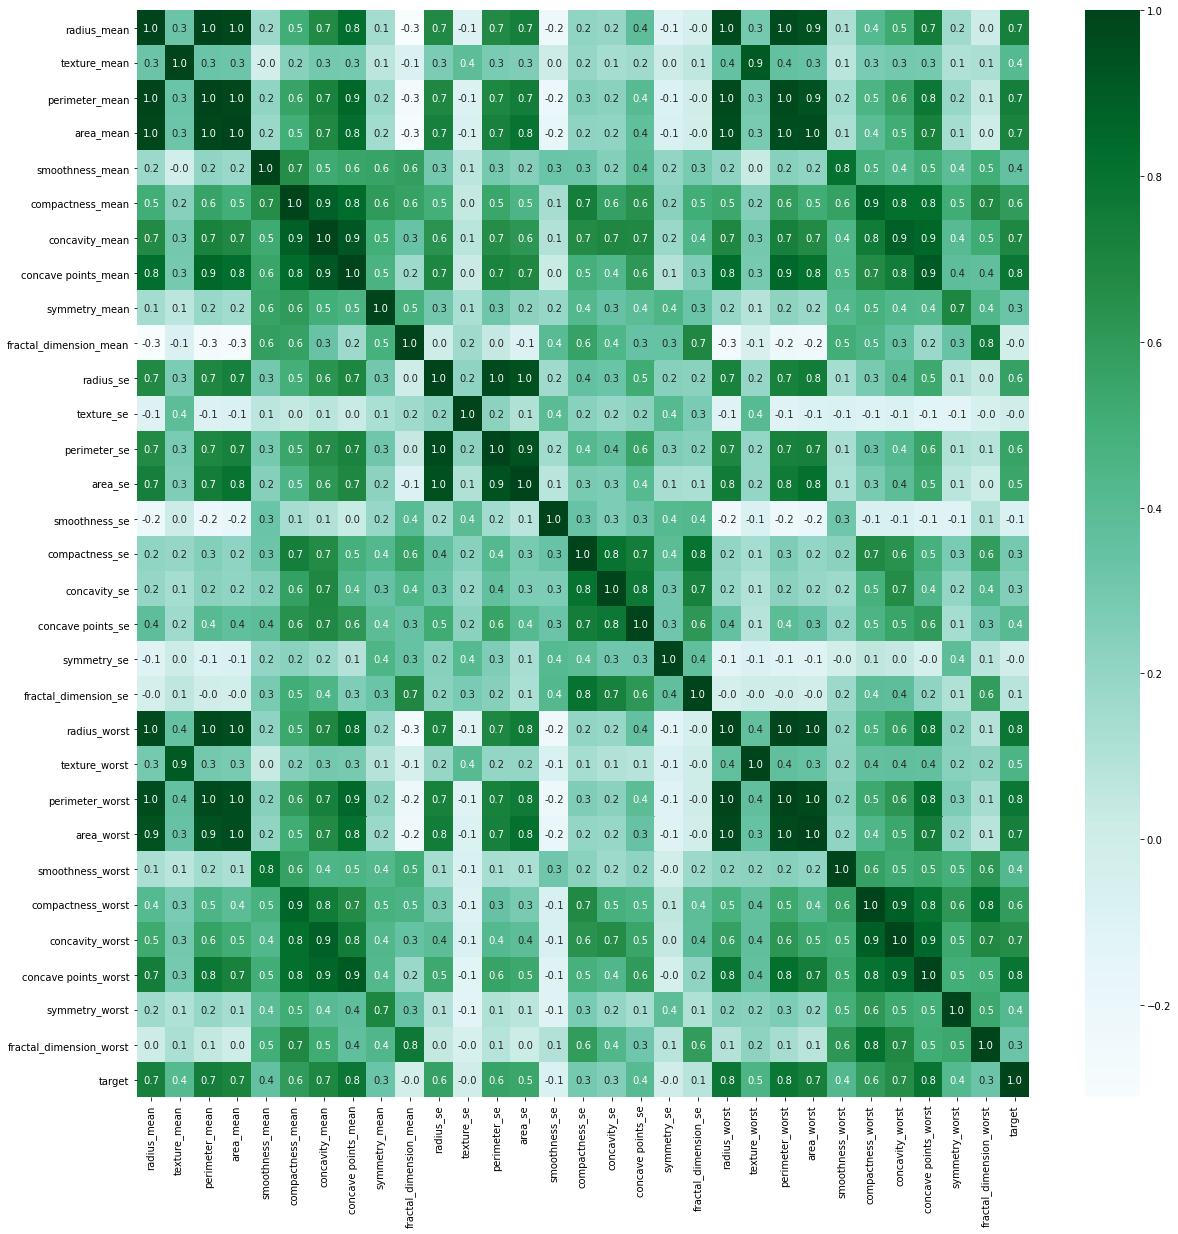

In [616]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap="BuGn")
plt.savefig('Correlation Heat map')

In [617]:
hashmap = {}

for column in df_copy.columns:
    correlation = df_copy[column].corr(df_copy["target"])
    if correlation >= 0.65:
#         if column == "target":
#             continue
        
        hashmap[column] = correlation

In [618]:
hashmap

{'radius_mean': 0.730028511375456,
 'perimeter_mean': 0.7426355297258328,
 'area_mean': 0.7089838365853895,
 'concavity_mean': 0.6963597071719053,
 'concave points_mean': 0.7766138400204353,
 'radius_worst': 0.7764537785950392,
 'perimeter_worst': 0.7829141371737587,
 'area_worst': 0.7338250349210507,
 'concavity_worst': 0.6596102103692327,
 'concave points_worst': 0.7935660171412696,
 'target': 1.0}

In [619]:
column_list = []
for keys in hashmap.keys():
    column_list.append(keys)

In [620]:
df = pd.DataFrame(df_copy, columns=column_list)
df

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,target
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430,1
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216,1
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628,1
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418,1
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650,1


In [621]:
df.iloc[[550]]

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,target
550,10.86,68.51,360.5,0.0,0.0,11.66,74.08,412.3,0.0,0.0,0


In [622]:
correlation_matrix = df.corr()

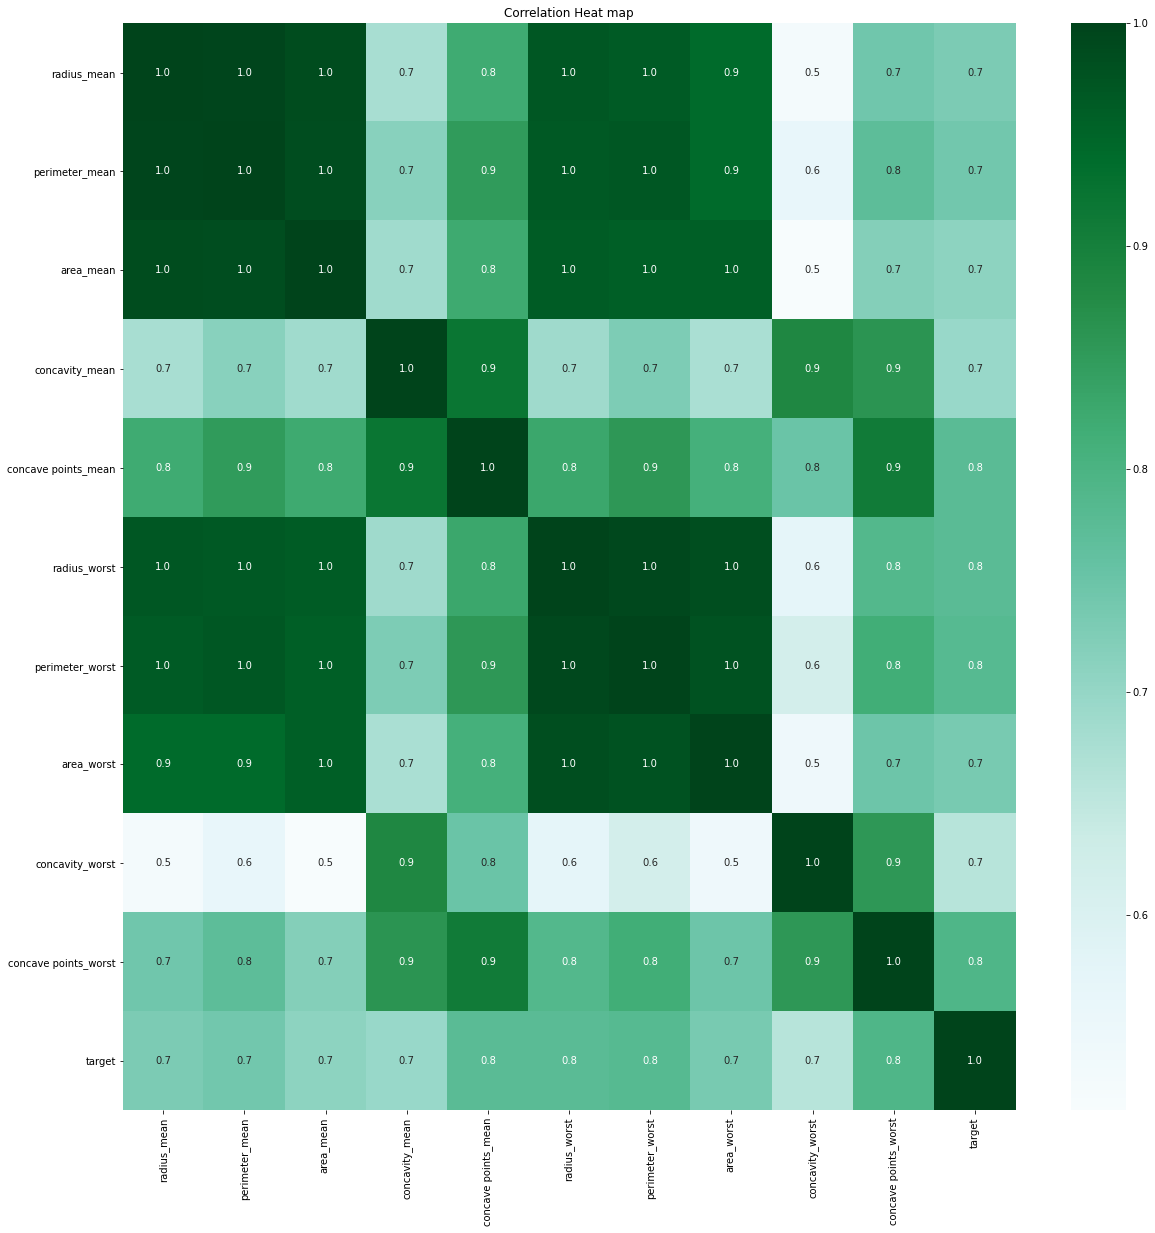

In [623]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap="BuGn")
plt.title('Correlation Heat map')
plt.show()

**VISUALIZING THE TARGET VALUES**

<AxesSubplot:xlabel='target', ylabel='count'>

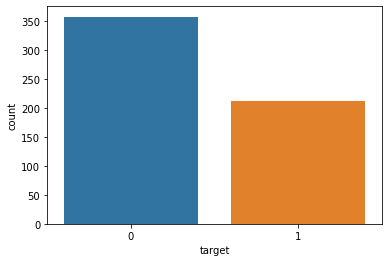

In [624]:
sns.countplot(x='target', data=df)

In [625]:
df.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst', 'target'],
      dtype='object')

In [626]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [627]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [628]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [629]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

# **CHECKING MODEL PERFORMANCES USING CROSS VAL SCORE**

In [630]:
from sklearn.model_selection import cross_val_score

**LOGISTIC REGRESSION**

In [631]:
scores_logistic_test = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_test, y_test,cv=5)
np.average(scores_logistic_test)

0.9565217391304348

In [632]:
scores_logistic_train = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, y_train,cv=5)
np.average(scores_logistic_train)

0.9472527472527472

**SUPPORT VECTOR MACHINE**

In [633]:
scores_svm_test = cross_val_score(SVC(gamma='auto'), X_test, y_test,cv=5)
np.average(scores_svm_test)

0.9652173913043478

In [634]:
scores_svm_train = cross_val_score(SVC(gamma='auto'), X_train, y_train,cv=5)
np.average(scores_svm_train)

0.9472527472527472

**RANDOM FOREST CLASSIFIER**


**TESTING DATA**

In [635]:
scores_svm_random_test = cross_val_score(RandomForestClassifier(n_estimators=5),X_test, y_test,cv=5)
np.average(scores_svm_random_test)

0.9296442687747035

In [636]:
scores_svm_random_test = cross_val_score(RandomForestClassifier(n_estimators=10),X_test, y_test,cv=5)
np.average(scores_svm_random_test)

0.9565217391304348

In [637]:
scores_svm_random_test = cross_val_score(RandomForestClassifier(n_estimators=20),X_test, y_test,cv=5)
np.average(scores_svm_random_test)

0.9565217391304348

**TRAINING DATA**

In [638]:
scores_svm_random_train = cross_val_score(RandomForestClassifier(n_estimators=5),X_train, y_train,cv=5)
np.average(scores_svm_random_train)

0.934065934065934

In [639]:
scores_svm_random_train = cross_val_score(RandomForestClassifier(n_estimators=10),X_train, y_train,cv=5)
np.average(scores_svm_random_train)

0.9318681318681318

In [640]:
scores_svm_random_train = cross_val_score(RandomForestClassifier(n_estimators=20),X_train, y_train,cv=5)
np.average(scores_svm_random_train)

0.9428571428571428

**NAIVE BAYES**

In [641]:
scores_naive_test = cross_val_score(BernoulliNB(alpha = 1, fit_prior = 'True'), X_test, y_test,cv=5)
np.average(scores_naive_test)

0.9478260869565218

In [642]:
scores_naive_train = cross_val_score(BernoulliNB(alpha = 1, fit_prior = 'True'),X_train, y_train,cv=5)
np.average(scores_naive_train)

0.9164835164835164

# **HYPER PARAMETER TUNING OF DIFFERENT MODELS USING GRIDSEARCHCV**

In [643]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes': {
        'model': BernoulliNB(),
        'params' : {
            'alpha': [0.1,0.5,1],
            'fit_prior': ['True','False']
        }  
    }
}

In [644]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.960440,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.940659,{'n_estimators': 5}
2,logistic_regression,0.956044,{'C': 5}
3,naive_bayes,0.916484,"{'alpha': 1, 'fit_prior': 'True'}"


# **SAVING BEST MODEL USING PICKLE FILE**

In [645]:
model_svm = SVC(C = 10, kernel = 'linear')
model_svm.fit(X_train,y_train)

SVC(C=10, kernel='linear')

In [647]:
import pickle

In [648]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model_svm,f)

In [649]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)


In [650]:
mp.predict(sc.transform([[10.86,68.51,360.5,0.0,0.0,11.66,74.08,412.3,0.0,0.0]]))

array([0])